<a href="https://colab.research.google.com/github/NikitaMarnykh/karnegie_mellon_university_machine_analysis/blob/main/%D0%9C%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D0%9D_%D0%92_%D1%83%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%9A%D0%B0%D1%80%D0%BD%D0%B5%D0%B3%D0%B8_%D0%9C%D0%B5%D0%BB%D0%BE%D0%BD_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B2%D0%B7%D0%B0%D0%B8%D0%BC%D0%BE%D1%81%D0%B2%D1%8F%D0%B7%D0%B8_%D0%B4%D0%B2%D1%83%D1%85_%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Признаки, которые будут использованы для дальнейшего анализа:

  * Количественные признаки:
  
    - mpg

    - cylinders

    - displacement

    - horsepower

    - weight

    - acceleration

    - model year

  * Категориальные признаки:

    - origin

## 9. Установка и подключение зависимостей

Устанавливаем все необходимые зависимости

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scipy
!pip install seaborn

Подключаем все необходимые зависимости

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as stats

import seaborn as sns

Подгружаем репозиторий для работы с ним

In [ ]:
!git clone https://github.com/NikitaMarnykh/karnegie_mellon_university_machine_analysis

Cloning into 'karnegie_mellon_university_machine_analysis'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (44/44), done.
Receiving objects: 100% (45/45), 660.53 KiB | 6.95 MiB/s, done.
remote: Total 45 (delta 28), reused 0 (delta 0), pack-reused 0 (from 0)
Resolving deltas: 100% (28/28), done.


Перейдём в установленный репозиторий

In [ ]:
%cd karnegie_mellon_university_machine_analysis/

/content/karnegie_mellon_university_machine_analysis


Сохраним датасет в переменную

In [ ]:
dtypes = {
    'origin': 'category'
}

dataset = pd.read_csv('auto-mpg-cleaned.csv',
                      na_values=['NA', 'N/A', 'null', 'missing', '-', '?', '...'],
                      keep_default_na=True,
                      na_filter=True,
                      dtype=dtypes)

Посмотрим информацию о датасете

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   mpg            398 non-null    float64 
 1   cylinders      398 non-null    int64   
 2   displacement   398 non-null    float64 
 3   horsepower     398 non-null    float64 
 4   weight         398 non-null    int64   
 5   acceleration   398 non-null    float64 
 6   model year     398 non-null    int64   
 7   origin         398 non-null    category
 8   origin_Europe  398 non-null    bool    
 9   origin_Asia    398 non-null    bool    
dtypes: bool(2), category(1), float64(4), int64(3)
memory usage: 23.2 KB


## 10 Анализ взаимосвязи двух количественных признаков

### 10.1 Проверка распределения количественных признаков на нормальность

Сохраним количественные признаки в переменную numerical_traits

In [ ]:
numerical_traits = dataset[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]

Посмотрим коэффициент асимметрии для всех количественных признаков
Посмотрим коэффициент эксцесса для всех количественных признаков
Проверим распределения признаков на нормальность. Так как размер датасета невелик — всего 398 наблюдений, — используем критерий Шапиро-Уилка.

Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05

In [ ]:
cols = numerical_traits.columns.tolist()
norm_results = pd.DataFrame(columns=['Асимметрия', 'Эксцесс', 'Статистика', 'p-value', 'Нормальность'], index=cols)

for col in cols:
    skewness = numerical_traits[col].skew()
    kurtosis = numerical_traits[col].kurtosis()

    # Тест Шапиро-Уилка
    statistic, p_value = stats.shapiro(numerical_traits[col])

    # Заполняем результаты
    norm_results.at[col, 'Асимметрия'] = skewness
    norm_results.at[col, 'Эксцесс'] = kurtosis
    norm_results.at[col, 'Статистика'] = statistic
    norm_results.at[col, 'p-value'] = p_value
    norm_results.at[col, 'Нормальность'] = 'Нормальное' if p_value > 0.05 else 'Не нормальное'
norm_results

,Асимметрия,Эксцесс,Статистика,p-value,Нормальность
mpg,0.457066,-0.510781,0.967966,0.0,Не нормальное
cylinders,0.526922,-1.376662,0.748729,0.0,Не нормальное
displacement,0.719645,-0.746597,0.880419,0.0,Не нормальное
horsepower,1.083903,0.710985,0.905981,0.0,Не нормальное
weight,0.531063,-0.785529,0.94136,0.0,Не нормальное
acceleration,0.278777,0.419497,0.992379,0.039869,Не нормальное
model year,0.011535,-1.181232,0.945851,0.0,Не нормальное


Выводы по анализу на нормальность количественных признаков:

  * В рамках анализа распределения количественных признаков была проведена комплексная оценка нормальности, включающая анализ коэффициентов асимметрии и эксцесса, а также формальное тестирование с использованием критерия Шапиро-Уилка (уровень значимости α = 0,05). Объем выборки составляет 398 наблюдений.

  * **Анализ коэффициентов асимметрии (skewness):**

    * Все анализируемые признаки демонстрируют положительную асимметрию (skewness > 0), за исключением признака `model year`, у которого асимметрия практически отсутствует (**0,012**).
    
    * Наиболее выраженная правосторонняя асимметрия наблюдается у признака `horsepower` (**1,084**), что указывает на существенное смещение распределения в сторону малых значений.

    * Умеренная асимметрия характерна для признаков `displacement` (**0,720**), `cylinders` (**0,527**), `weight` (**0,531**) и `mpg` (**0,457**).
  - Наименее выраженная асимметрия зафиксирована у признака `acceleration` (**0,279**).

 * **Анализ коэффициентов эксцесса (kurtosis):**
    
    * Большинство признаков (`mpg`: **-0,511**; `cylinders`: **-1,377**; `displacement`: **-0,747**; `weight`: **-0,786**; `model year`: **-1,181**) имеют отрицательный эксцесс, что соответствует платикуртическому распределению (более плоскому по сравнению с нормальным).
    
    * Признаки `horsepower` (**0,711**) и `acceleration` (**0,419**) демонстрируют положительный эксцесс, указывающий на лептокуртическое распределение (более островершинное, чем нормальное).

  * **Результаты теста Шапиро-Уилка:**
  
    * Для всех анализируемых признаков полученное p-value меньше установленного уровня значимости **0,05**:
    
    * Для признаков `mpg`, `cylinders`, `displacement`, `horsepower`, `weight` и `model year` p-value = **0,000**
    
    * Для признака `acceleration` p-value = **0,040**

    * Во всех случаях нулевая гипотеза (H₀) о нормальности распределения отвергается.

  * **Общий вывод:**
    * На основании комплексного анализа, включающего оценку коэффициентов асимметрии и эксцесса, а также результаты формального статистического тестирования, **ни один из анализируемых количественных признаков не может быть описан нормальным распределением.** Данное заключение следует учитывать при выборе статистических методов и алгоритмов машинного обучения, чувствительных к предположению о нормальности распределения данных.

### 10.2 Признаки mpg и cylinders

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

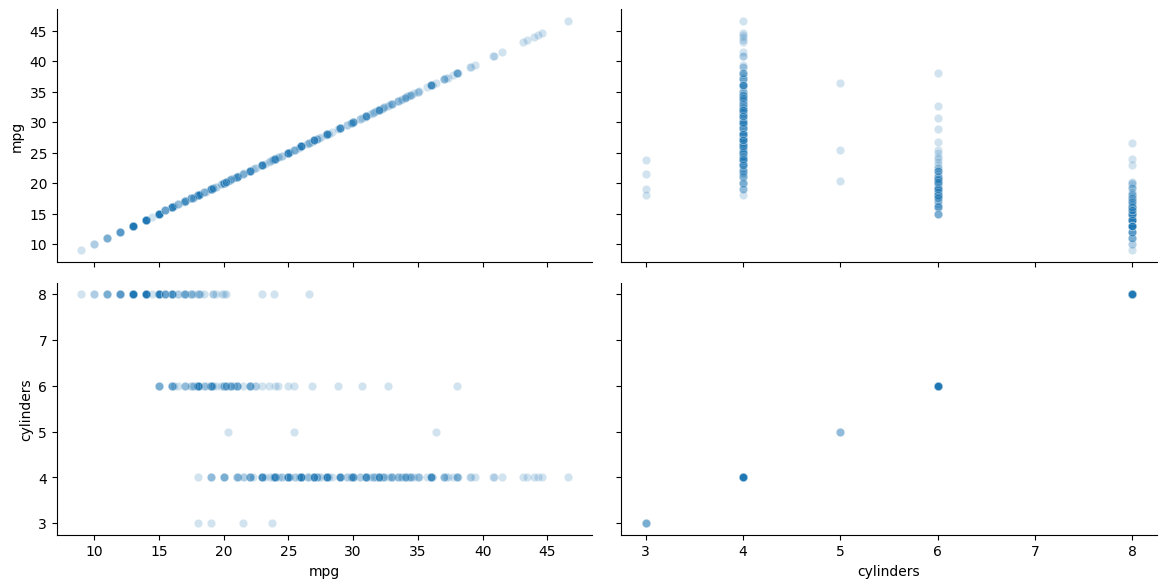

In [ ]:
columns = ['mpg', 'cylinders']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,mpg,cylinders
mpg,1.000000,-0.686477
cylinders,-0.686477,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,mpg,cylinders
mpg,1.000000e+00,6.818811e-69
cylinders,6.818811e-69,1.000000e+00


Построим теполовую карту для признаков

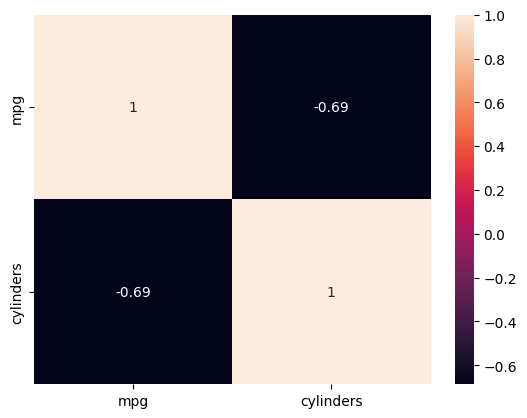

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

  * **Визуальная оценка (Диаграмма рассеяния):**
      
      *   На диаграмме рассеяния наблюдается **выраженная** связь между признаками.
      
      * Визуально характер связи определяется как **линейная**, а направление — **отрицательное**: с ростом значения `cylinders` наблюдается **снижение** значения `mpg`.

  * **Статистическое подтверждение:**
      
      * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.69, что подтверждает наличие **сильной** **отрицательной** монотонной зависимости между переменными.
      
      * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 6.82e-69**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **сильная** **отрицательная** **монотонная** взаимосвязь между признаками `mpg` и `cylinders`, которая является **статистически достоверной**.

### 10.3 Признаки mpg и displacement

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

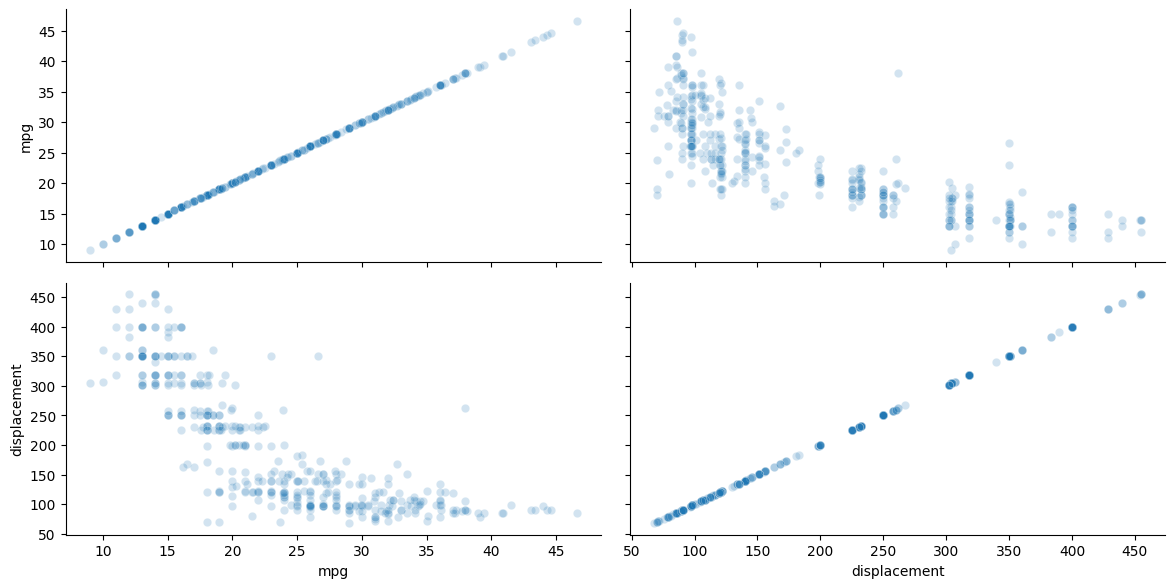

In [ ]:
columns = ['mpg', 'displacement']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,mpg,displacement
mpg,1.000000,-0.679847
displacement,-0.679847,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,mpg,displacement
mpg,1.000000e+00,8.092399e-88
displacement,8.092399e-88,1.000000e+00


Построим теполовую карту для признаков

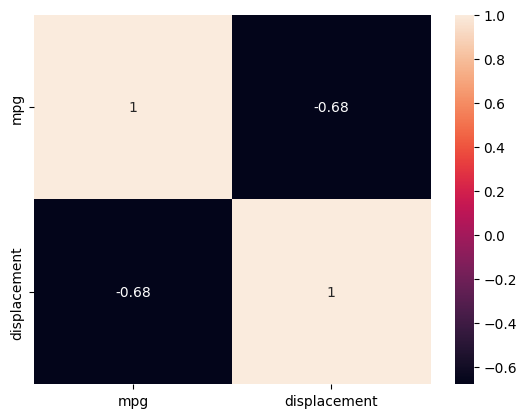

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **выраженная** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная монотонная**, а направление — **отрицательное**: с ростом значения `displacement` наблюдается **снижение** значения `mpg`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.68, что подтверждает наличие **сильной** **отрицательной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 8.092e-88**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **сильная** **отрицательная** **монотонная нелинейная** взаимосвязь между признаками `mpg` и `displacement`, которая является **статистически достоверной**.

### 10.4 Признаки mpg и horsepower

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

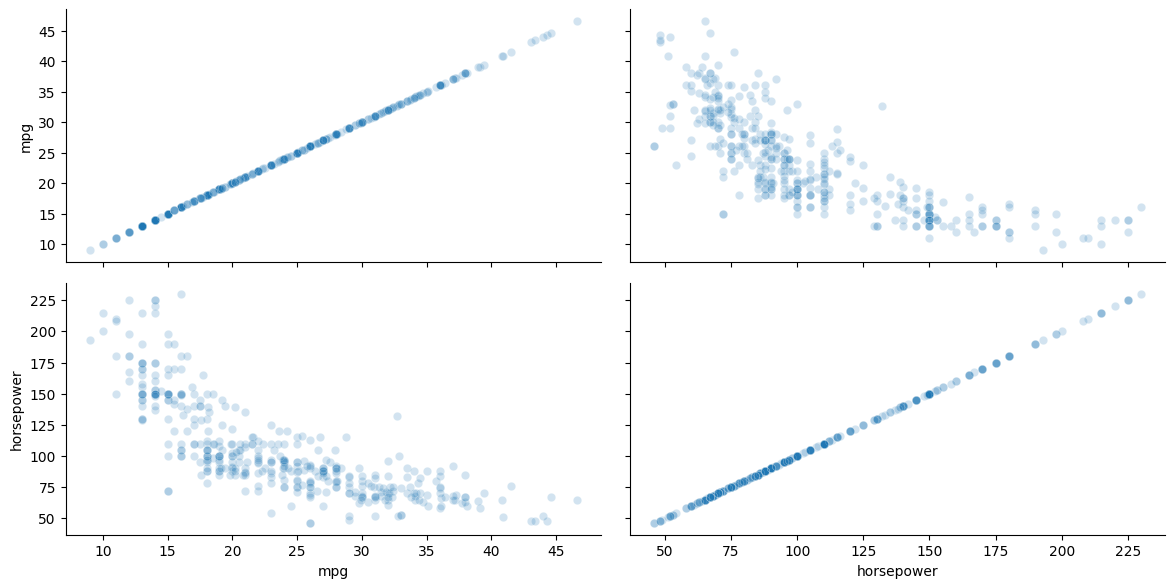

In [ ]:
columns = ['mpg', 'horsepower']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,mpg,horsepower
mpg,1.000000,-0.677016
horsepower,-0.677016,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,mpg,horsepower
mpg,1.000000e+00,3.765261e-87
horsepower,3.765261e-87,1.000000e+00


Построим теполовую карту для признаков

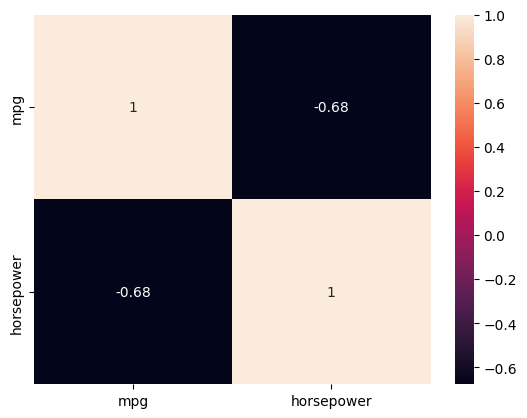

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **выраженная** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная монотонная**, а направление — **отрицательное**: с ростом значения `horsepower` наблюдается **снижение** значения `mpg`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.68, что подтверждает наличие **сильной** **отрицательной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 3.765e-87**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **сильная** **отрицательная** **монотонная нелинейная** взаимосвязь между признаками `mpg` и `horsepower`, которая является **статистически достоверной**.

### 10.5 Признаки mpg и weight

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

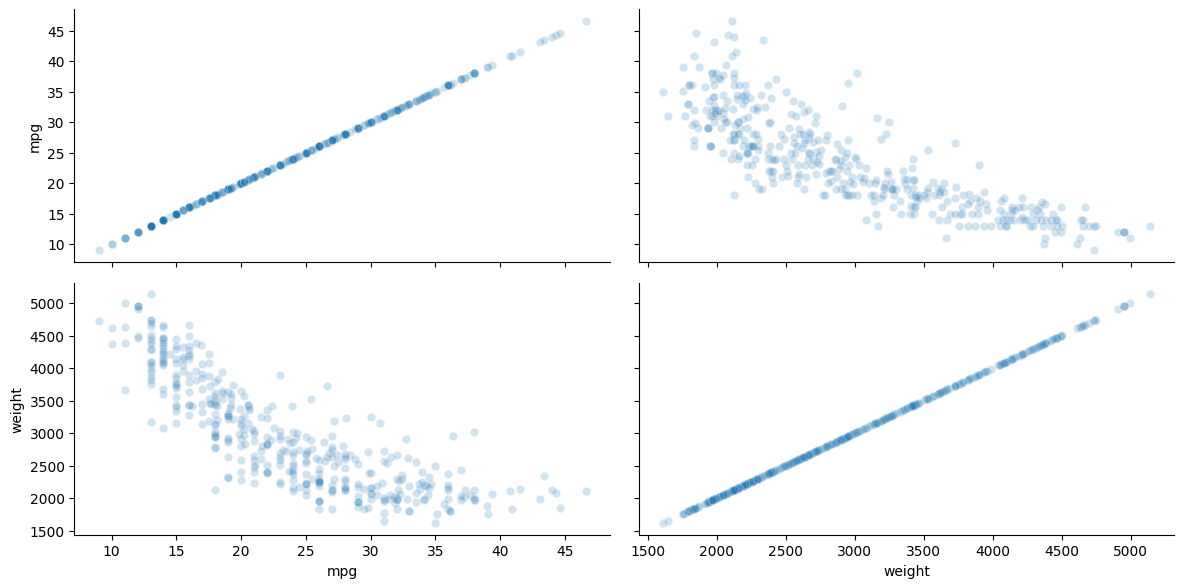

In [ ]:
columns = ['mpg', 'weight']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,mpg,weight
mpg,1.000000,-0.694006
weight,-0.694006,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,mpg,weight
mpg,1.000000e+00,2.618341e-93
weight,2.618341e-93,1.000000e+00


Построим теполовую карту для признаков

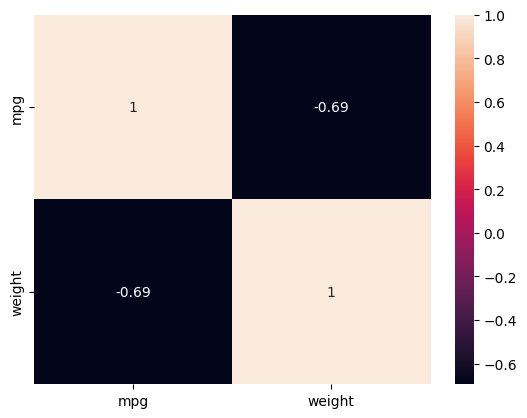

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **выраженная** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная монотонная**, а направление — **отрицательное**: с ростом значения `weight` наблюдается **снижение** значения `mpg`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.69, что подтверждает наличие **сильной** **отрицательной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 2.62e-93**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **сильная** **отрицательная** **монотонная нелинейная** взаимосвязь между признаками `mpg` и `weight`, которая является **статистически достоверной**.

### 10.6 Признаки mpg и acceleration

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

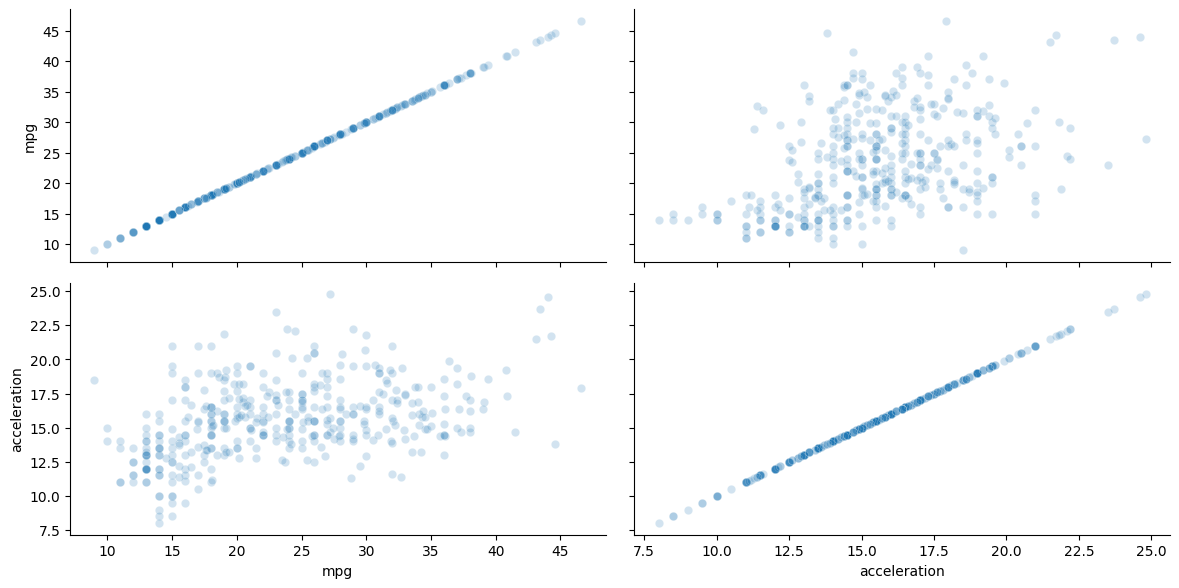

In [ ]:
columns = ['mpg', 'acceleration']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,mpg,acceleration
mpg,1.000000,0.301096
acceleration,0.301096,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,mpg,acceleration
mpg,1.000000e+00,1.301506e-18
acceleration,1.301506e-18,1.000000e+00


Построим теполовую карту для признаков

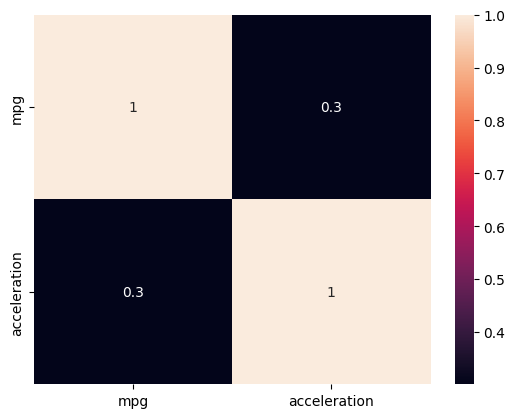

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **слабая** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная**, а направление — **положительное**: с ростом значения `mpg` наблюдается **увеличение** значения `acceleration`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = 0.30, что подтверждает наличие **слабой** **положительной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 1.30e-18**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **слабая** **положительная** **монотонная** взаимосвязь между признаками `mpg` и `acceleration`, которая является **статистически достоверной**, но не обладает выраженной практической значимостью.

### 10.7 Признаки mpg и model year

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

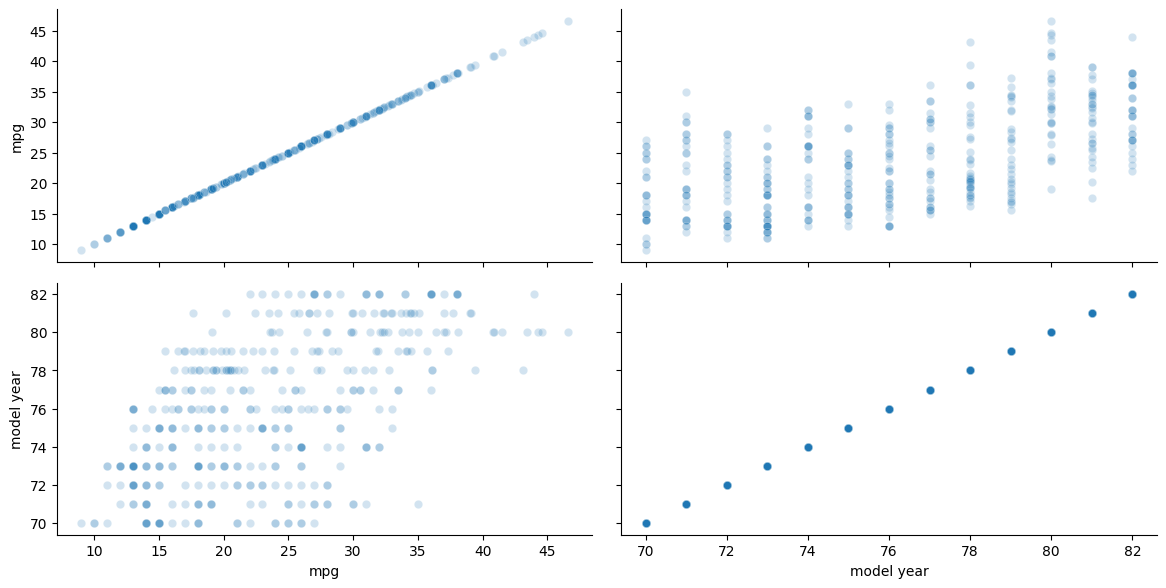

In [ ]:
columns = ['mpg', 'model year']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,mpg,model year
mpg,1.000000,0.413661
model year,0.413661,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,mpg,model year
mpg,1.000000e+00,4.708199e-32
model year,4.708199e-32,1.000000e+00


Построим теполовую карту для признаков

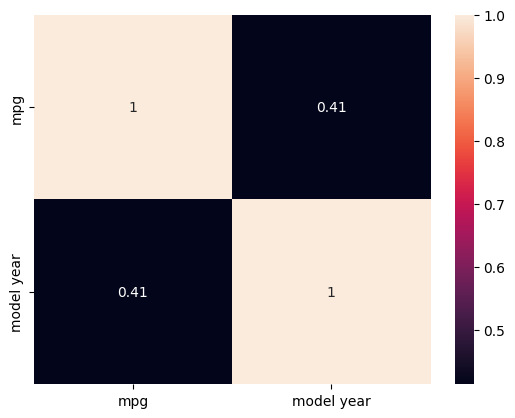

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков :

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **умеренная** связь между признаками.
    
    * Визуально характер связи определяется как **линейная**, а направление — **положительное**: с ростом значения `model year` наблюдается **увеличение** значения `mpg`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = 0.41, что подтверждает наличие **умеренной** **положительной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 4.71e-32**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **умеренная** **положительная** **монотонная** взаимосвязь между признаками `mpg` и `model year`, которая является **статистически достоверной**.

### 10.8 Признаки cylinders и displacement

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

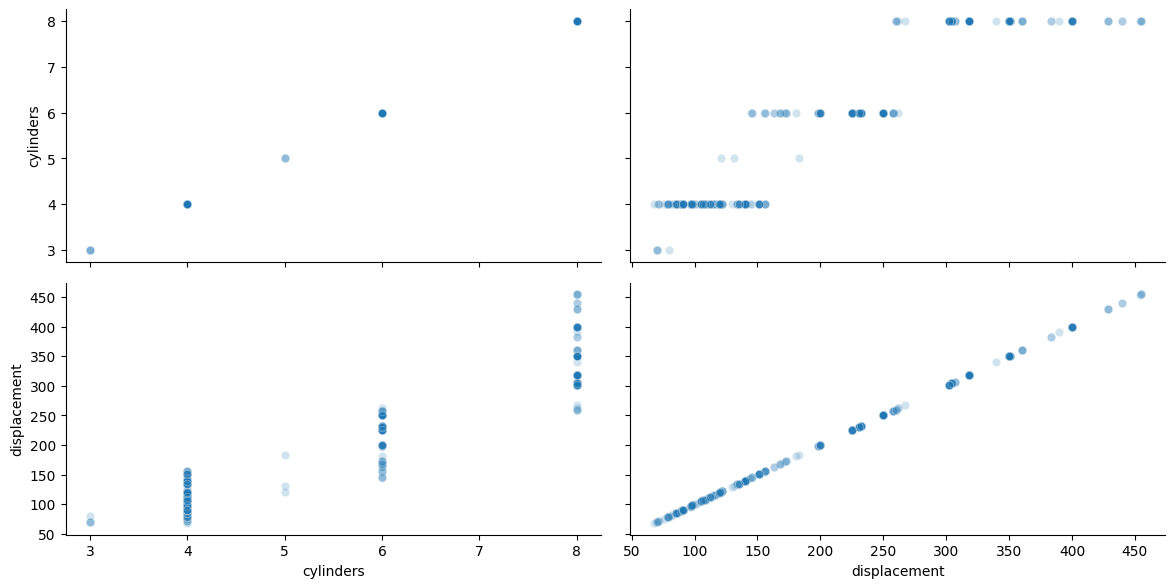

In [ ]:
columns = ['cylinders', 'displacement']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,cylinders,displacement
cylinders,1.000000,0.794854
displacement,0.794854,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,cylinders,displacement
cylinders,1.000000e+00,2.347263e-91
displacement,2.347263e-91,1.000000e+00


Построим теполовую карту для признаков

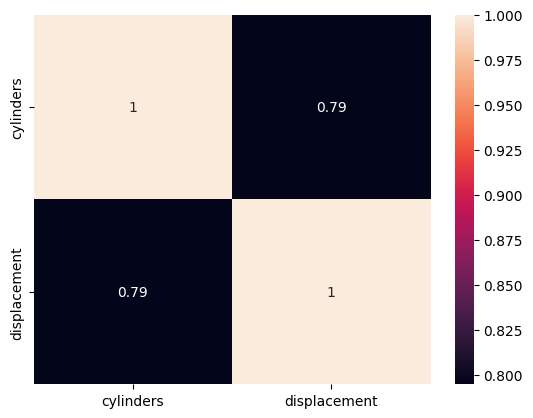

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **сильная** связь между признаками.
    
    * Визуально характер связи определяется как **линейная**, а направление — **положительное**: с ростом значения `cylinders` наблюдается **увеличение** значения `displacement`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = 0.79, что подтверждает наличие **сильной** **положительной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 2.35e-91**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **сильная** **положительная** **монотонная** взаимосвязь между признаками `cylinders` и `displacement`, которая является **статистически достоверной**.

### 10.9 Признаки cylinders и horsepower

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

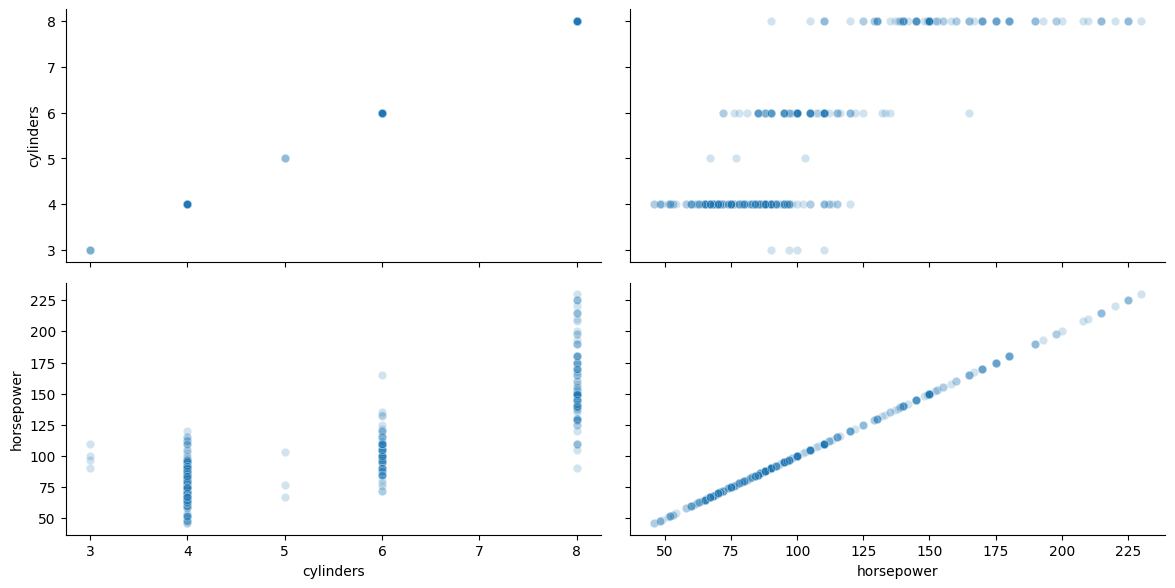

In [ ]:
columns = ['cylinders', 'horsepower']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,cylinders,horsepower
cylinders,1.000000,0.681365
horsepower,0.681365,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,cylinders,horsepower
cylinders,1.000000e+00,1.150468e-67
horsepower,1.150468e-67,1.000000e+00


Построим теполовую карту для признаков

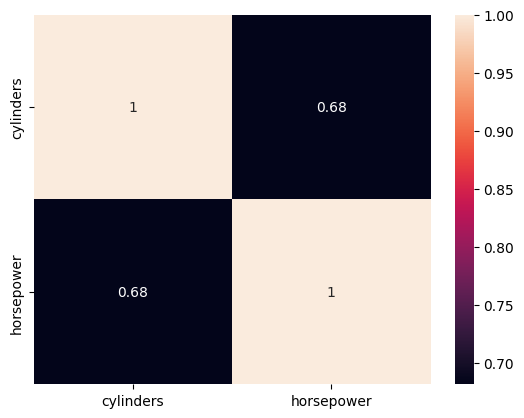

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **сильная** связь между признаками.
    
    * Визуально характер связи определяется как **линейная**, а направление — **положительное**: с ростом значения `cylinders` наблюдается **увеличение** значения `horsepower`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = 0.68, что подтверждает наличие **сильной** **положительной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 1.15e-67**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **сильная** **положительная** **монотонная** взаимосвязь между признаками `cylinders` и `horsepower`, которая является **статистически достоверной**.

### 10.10 Признаки cylinders и weight

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

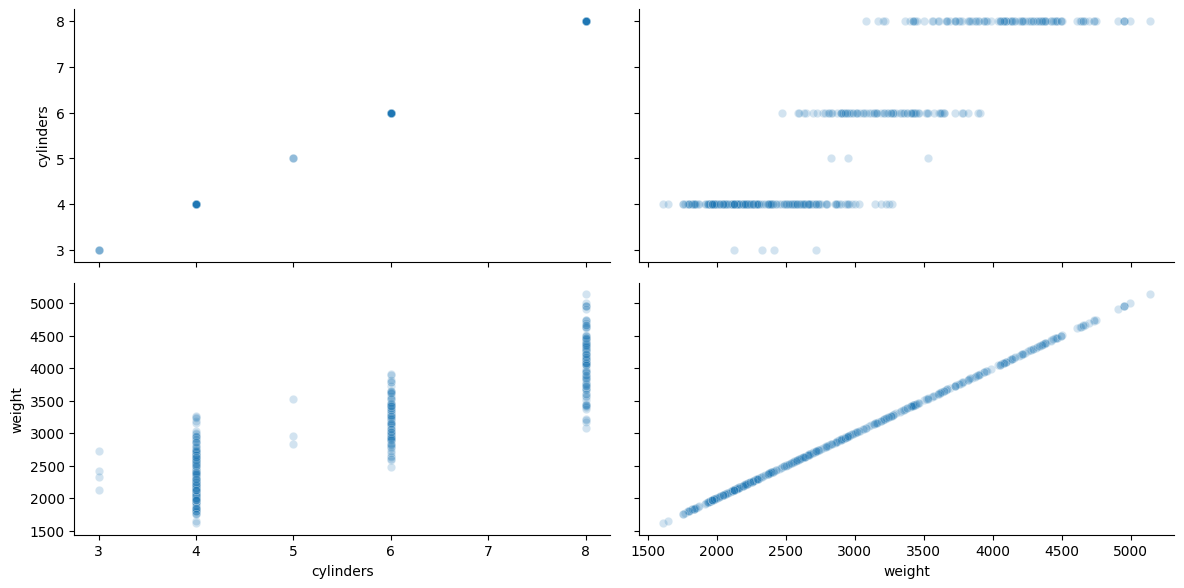

In [ ]:
columns = ['cylinders', 'weight']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,cylinders,weight
cylinders,1.000000,0.735481
weight,0.735481,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,cylinders,weight
cylinders,1.000000e+00,4.238674e-80
weight,4.238674e-80,1.000000e+00


Построим теполовую карту для признаков

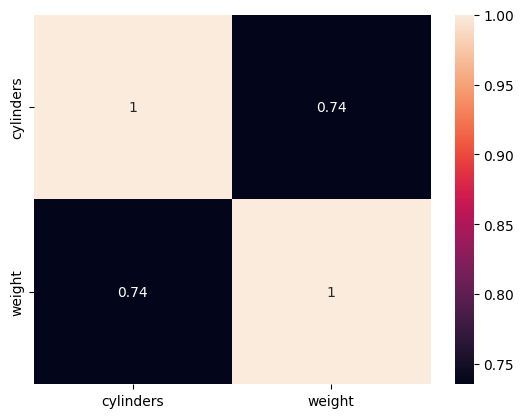

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **сильная** связь между признаками.
    
    * Визуально характер связи определяется как **линейная**, а направление — **положительное**: с ростом значения `cylinders` наблюдается **увеличение** значения `weight`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = 0.74, что подтверждает наличие **сильной** **положительной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 4.24e-80**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **сильная** **положительная** **монотонная** взаимосвязь между признаками `cylinders` и `weight`, которая является **статистически достоверной**.

### 10.11 Признаки cylinders и acceleration

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

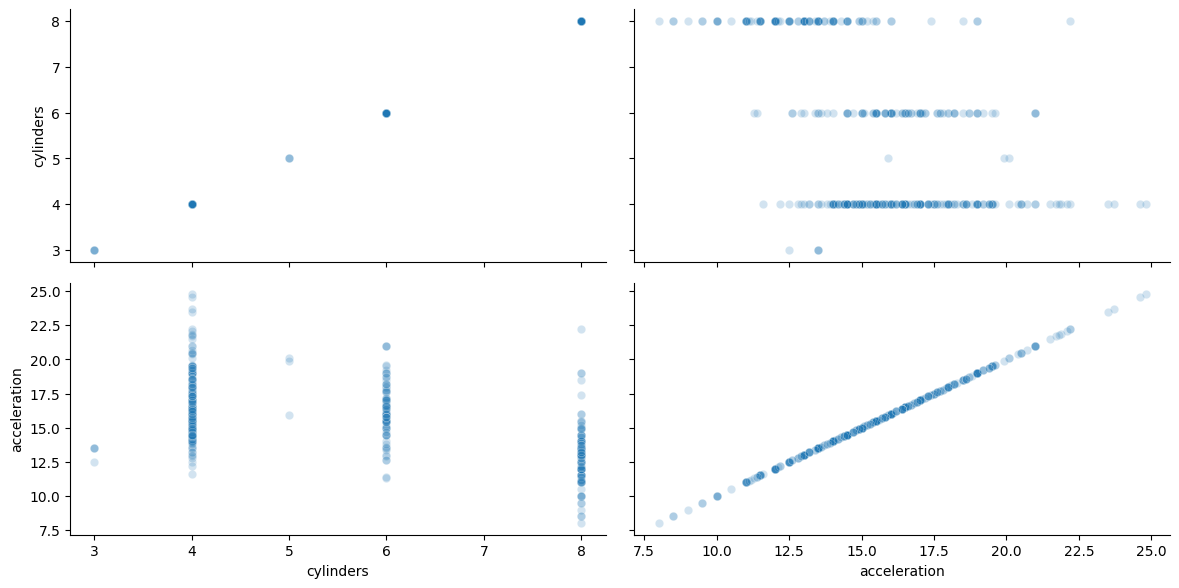

In [ ]:
columns = ['cylinders', 'acceleration']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,cylinders,acceleration
cylinders,1.000000,-0.367194
acceleration,-0.367194,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,cylinders,acceleration
cylinders,1.000000e+00,7.110032e-21
acceleration,7.110032e-21,1.000000e+00


Построим теполовую карту для признаков

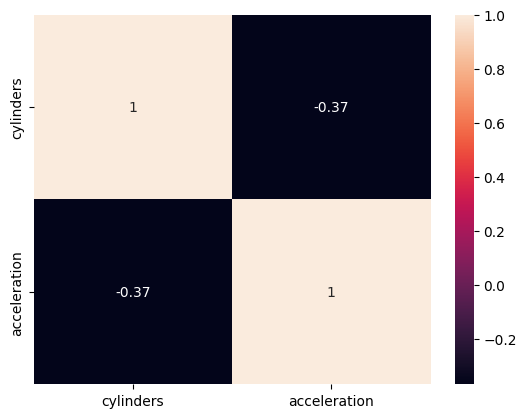

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **умеренная** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная**, а направление — **отрицательное**: с ростом значения `cylinders` наблюдается **снижение** значения `acceleration`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.37, что подтверждает наличие **умеренной** **отрицательной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 7.11e-21**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **умеренная** **отрицательная** **монотонная** взаимосвязь между признаками `cylinders` и `acceleration`, которая является **статистически достоверной**.

### 10.12 Признаки cylinders и model year

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

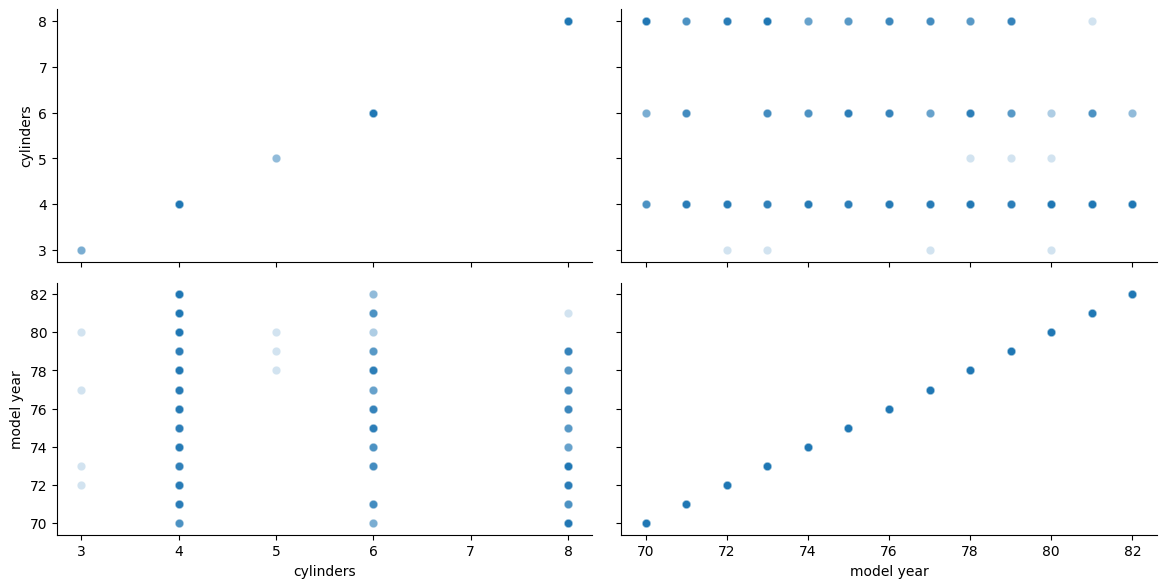

In [ ]:
columns = ['cylinders', 'model year']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,cylinders,model year
cylinders,1.000000,-0.273742
model year,-0.273742,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,cylinders,model year
cylinders,1.000000e+00,1.007446e-11
model year,1.007446e-11,1.000000e+00


Построим теполовую карту для признаков

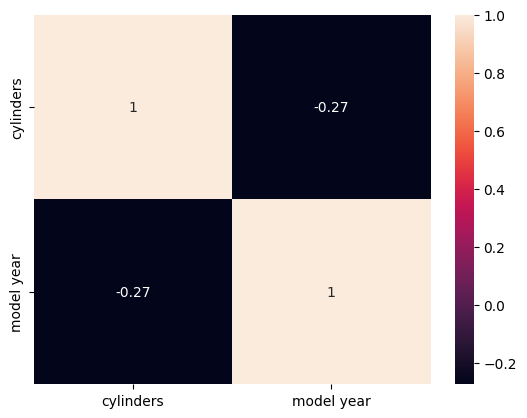

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **слабая** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная**, а направление — **отрицательное**: с ростом значения `model year` наблюдается **снижение** значения `cylinders`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.27, что подтверждает наличие **слабой** **отрицательной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 1.01e-11**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **слабая** **отрицательная** **монотонная** взаимосвязь между признаками `cylinders` и `model year`, которая является **статистически достоверной**, но не обладает выраженной практической значимостью.

### 10.13 Признаки displacement и horsepower

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

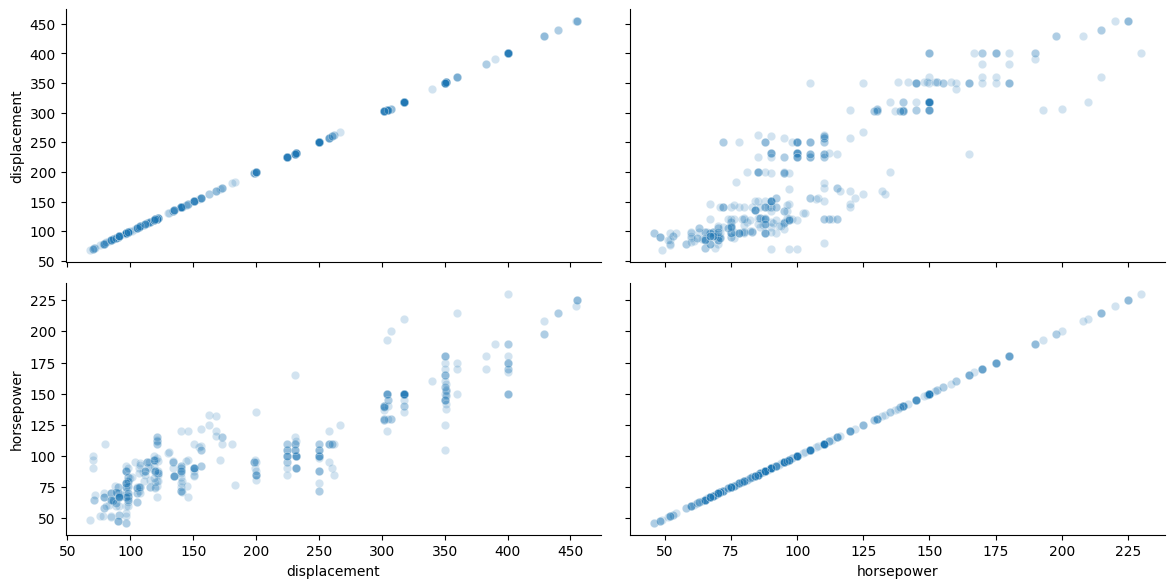

In [ ]:
columns = ['displacement', 'horsepower']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,displacement,horsepower
displacement,1.000000,0.717498
horsepower,0.717498,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,displacement,horsepower
displacement,1.000000e+00,2.924078e-97
horsepower,2.924078e-97,1.000000e+00


Построим теполовую карту для признаков

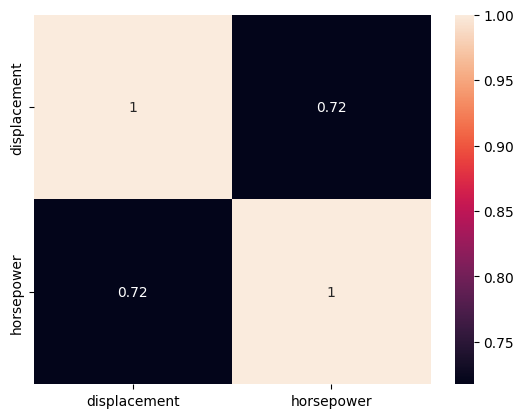

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **сильная** связь между признаками.
    
    * Визуально характер связи определяется как **линейная**, а направление — **положительное**: с ростом значения `displacement` наблюдается **увеличение** значения `horsepower`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = 0.72, что подтверждает наличие **сильной** **положительной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 2.92e-97**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **сильная** **положительная** **монотонная** взаимосвязь между признаками `displacement` и `horsepower`, которая является **статистически достоверной**.

### 10.14 Признаки displacement и weight

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

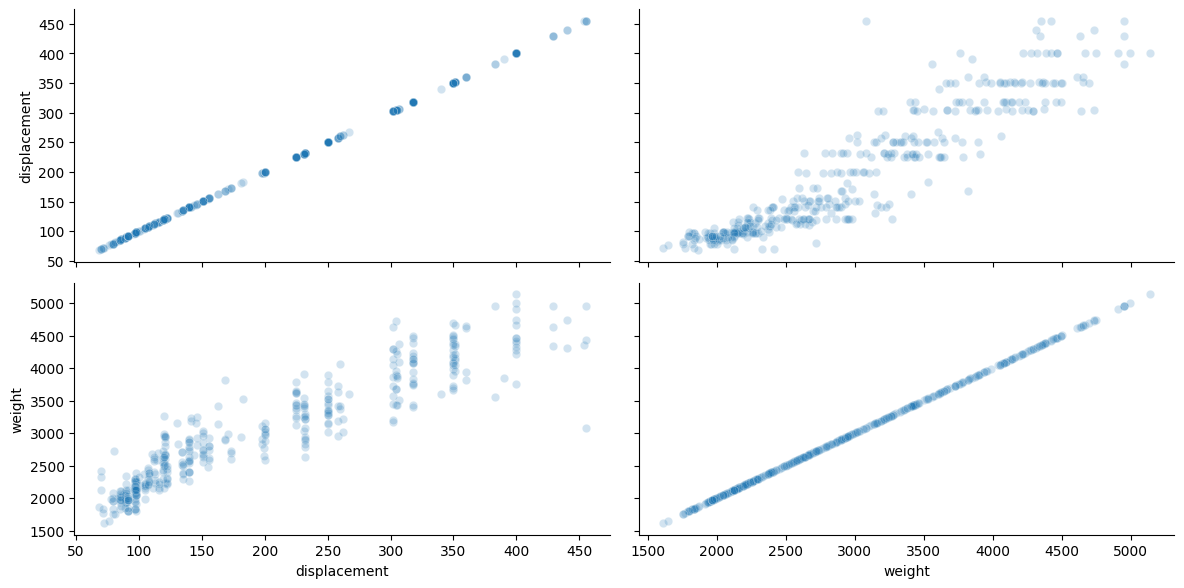

In [ ]:
columns = ['displacement', 'weight']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,displacement,weight
displacement,1.000000,0.800508
weight,0.800508,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,displacement,weight
displacement,1.000000e+00,5.241133e-123
weight,5.241133e-123,1.000000e+00


Построим теполовую карту для признаков

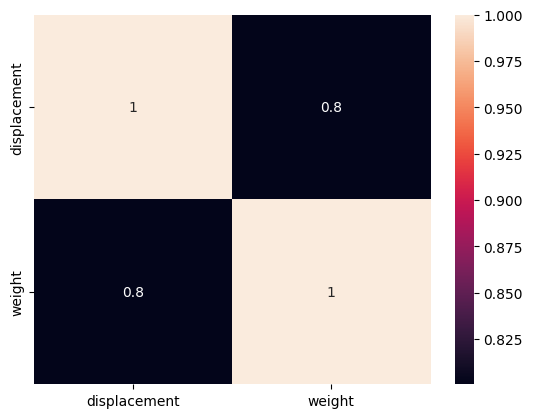

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **сильная** связь между признаками.
    
    * Визуально характер связи определяется как **линейная**, а направление — **положительное**: с ростом значения `displacement` наблюдается **увеличение** значения `weight`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = 0.80, что подтверждает наличие **сильной** **положительной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 5.24e-123**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **сильная** **положительная** **монотонная** взаимосвязь между признаками `displacement` и `weight`, которая является **статистически достоверной**.

### 10.15 Признаки displacement и acceleration

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

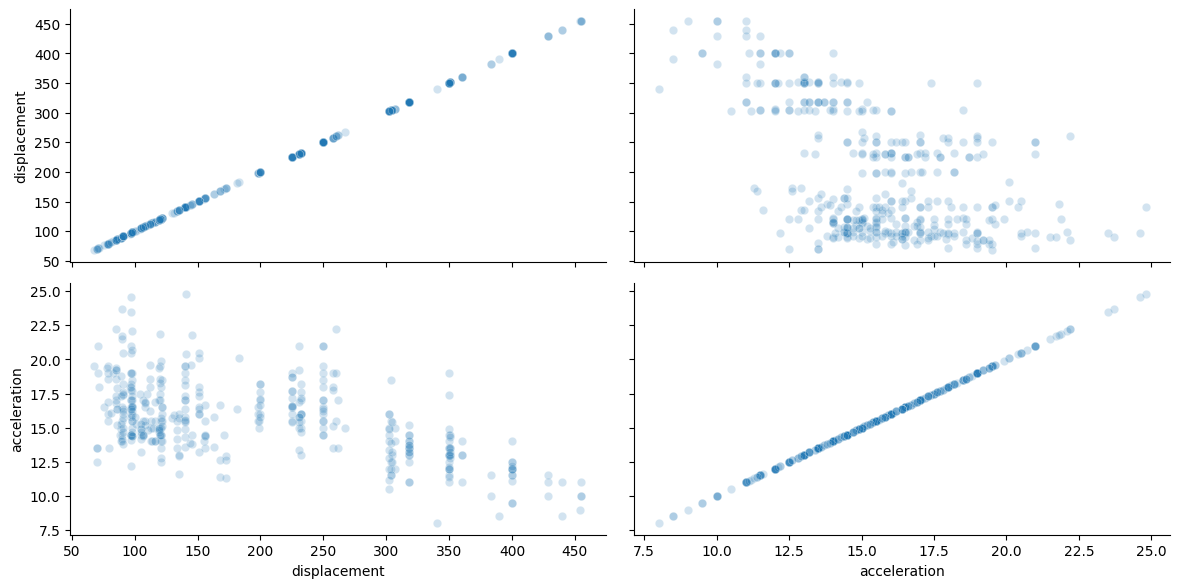

In [ ]:
columns = ['displacement', 'acceleration']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,displacement,acceleration
displacement,1.00000,-0.35211
acceleration,-0.35211,1.00000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,displacement,acceleration
displacement,1.000000e+00,8.981514e-25
acceleration,8.981514e-25,1.000000e+00


Построим теполовую карту для признаков

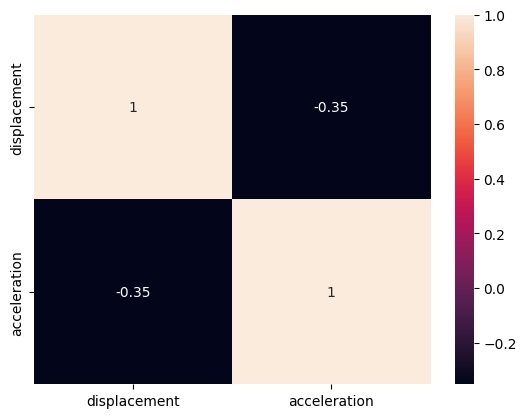

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **умеренная** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная**, а направление — **отрицательное**: с ростом значения `displacement` наблюдается **снижение** значения `acceleration`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.35, что подтверждает наличие **умеренной** **отрицательной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 8.98e-25**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **умеренная** **отрицательная** **монотонная** взаимосвязь между признаками `displacement` и `acceleration`, которая является **статистически достоверной**.

### 10.16 Признаки displacement и model year

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

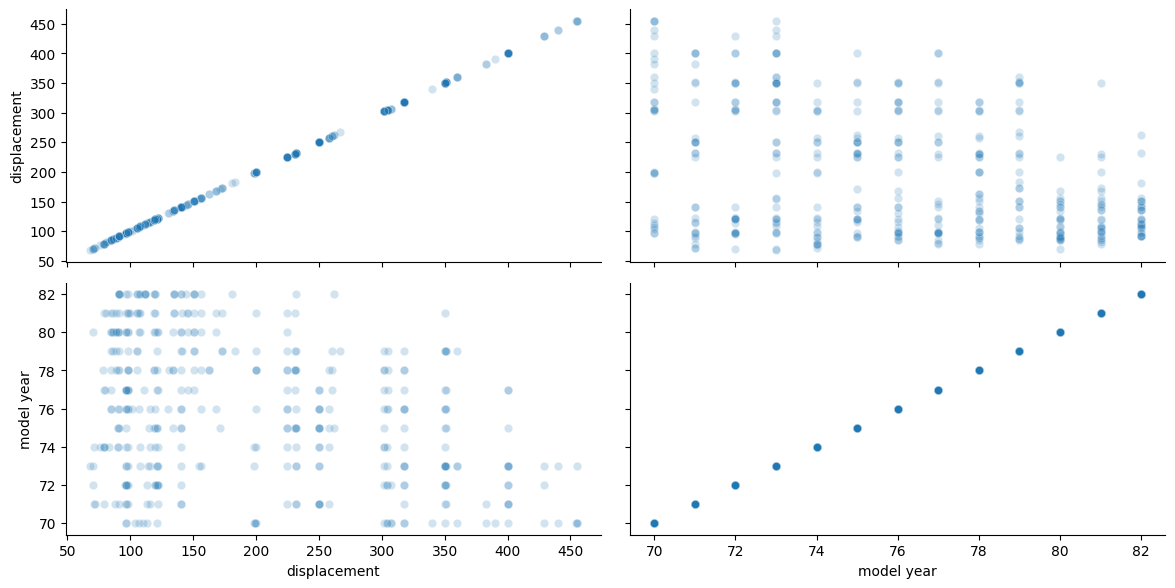

In [ ]:
columns = ['displacement', 'model year']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,displacement,model year
displacement,1.00000,-0.21892
model year,-0.21892,1.00000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,displacement,model year
displacement,1.000000e+00,4.850969e-10
model year,4.850969e-10,1.000000e+00


Построим теполовую карту для признаков

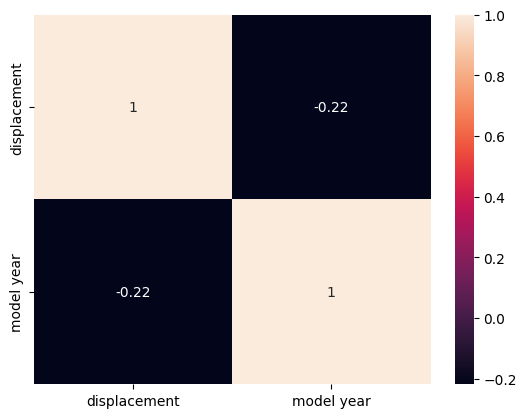

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **слабая** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная**, а направление — **отрицательное**: с ростом значения `model year` наблюдается **снижение** значения `displacement`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.22, что подтверждает наличие **слабой** **отрицательной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 4.85e-10**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся **статистически значимой**.

**Общий вывод:** Обнаружена **слабая** **отрицательная** взаимосвязь между признаками `displacement` и `model year`, которая **является статистически достоверной**.

### 10.17 Признаки horsepower и weight

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

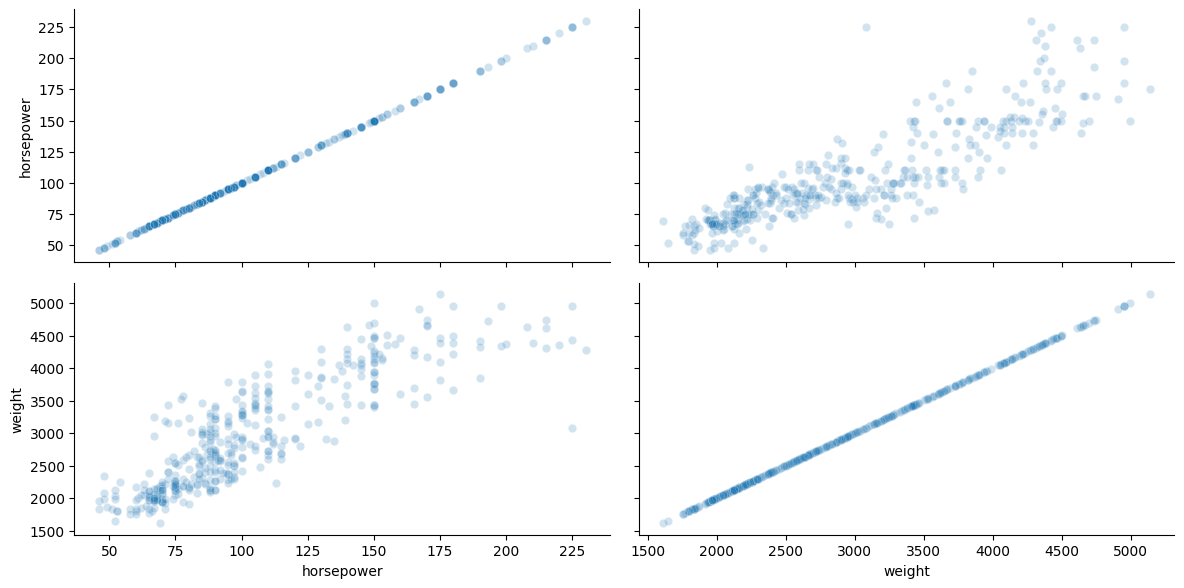

In [ ]:
columns = ['horsepower', 'weight']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,horsepower,weight
horsepower,1.000000,0.703654
weight,0.703654,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,horsepower,weight
horsepower,1.000000e+00,1.546301e-95
weight,1.546301e-95,1.000000e+00


Построим теполовую карту для признаков

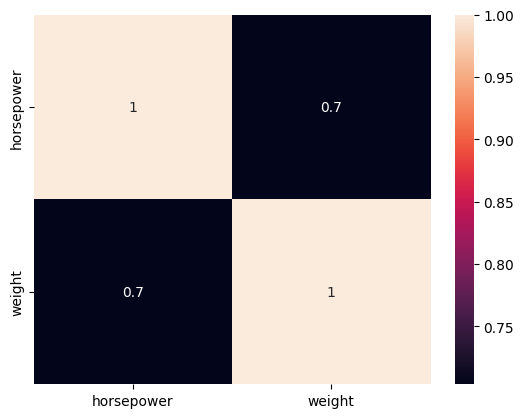

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **сильная** связь между признаками.
    
    * Визуально характер связи определяется как **линейная**, а направление — **положительное**: с ростом значения `horsepower` наблюдается **увеличение** значения `weight`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = 0.70, что подтверждает наличие **сильной** **положительной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 1.55e-95**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **сильная** **положительная** **монотонная** взаимосвязь между признаками `horsepower` и `weight`, которая является **статистически достоверной**.

### 10.18 Признаки horsepower и acceleration

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

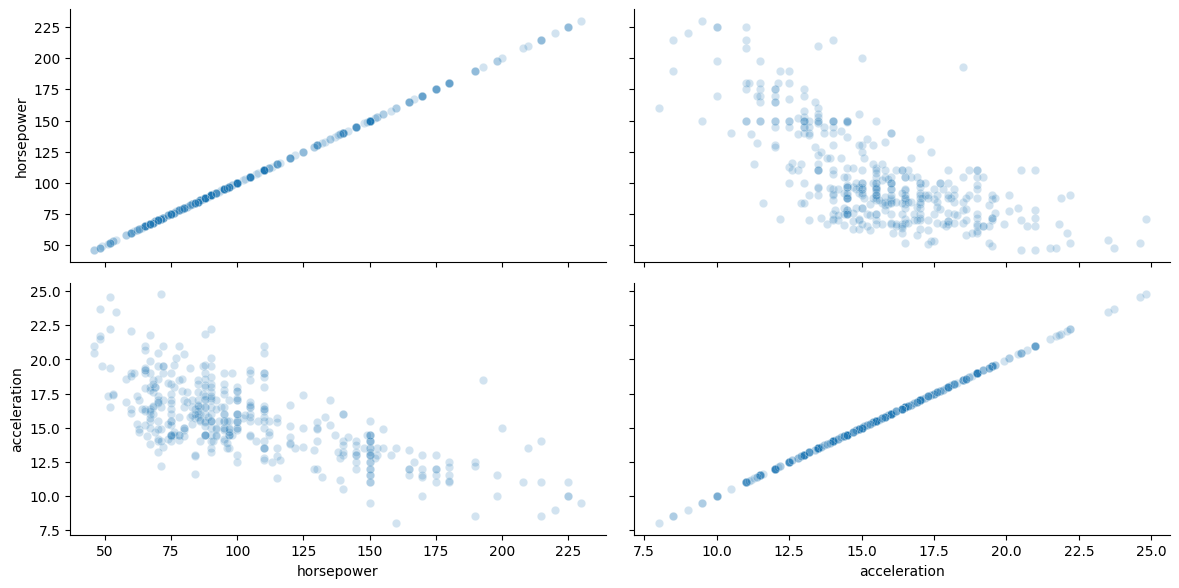

In [ ]:
columns = ['horsepower', 'acceleration']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,horsepower,acceleration
horsepower,1.000000,-0.483205
acceleration,-0.483205,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,horsepower,acceleration
horsepower,1.000000e+00,3.459227e-45
acceleration,3.459227e-45,1.000000e+00


Построим теполовую карту для признаков

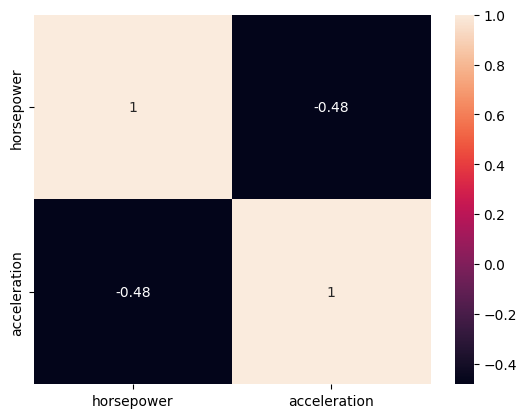

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **умеренная** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная**, а направление — **отрицательное**: с ростом значения `horsepower` наблюдается **снижение** значения `acceleration`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.48, что подтверждает наличие **умеренной** **отрицательной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 3.46e-45**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **умеренная** **отрицательная** **монотонная** взаимосвязь между признаками `horsepower` и `acceleration`, которая является **статистически достоверной**.

### 10.19 Признаки horsepower и model year

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

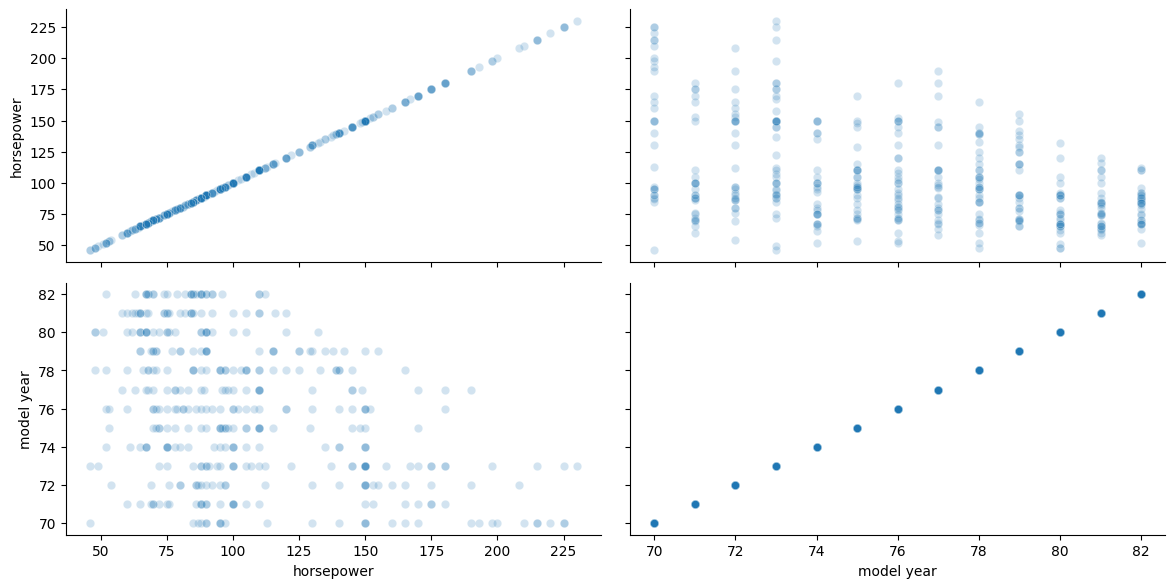

In [ ]:
columns = ['horsepower', 'model year']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,horsepower,model year
horsepower,1.000000,-0.272919
model year,-0.272919,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,horsepower,model year
horsepower,1.000000e+00,8.416831e-15
model year,8.416831e-15,1.000000e+00


Построим теполовую карту для признаков

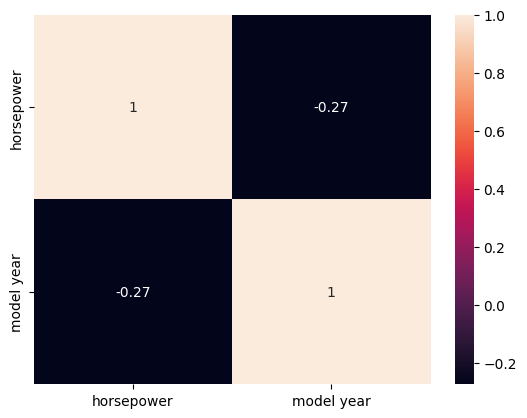

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **слабая** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная**, а направление — **отрицательное**: с ростом значения `model year` наблюдается **снижение** значения `horsepower`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.27, что подтверждает наличие **слабой** **отрицательной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 8.42e-15**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **слабая** **отрицательная** **монотонная** взаимосвязь между признаками `horsepower` и `model year`, которая является **статистически достоверной**, но не обладает выраженной практической значимостью.

### 10.20 Признаки weight и acceleration

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

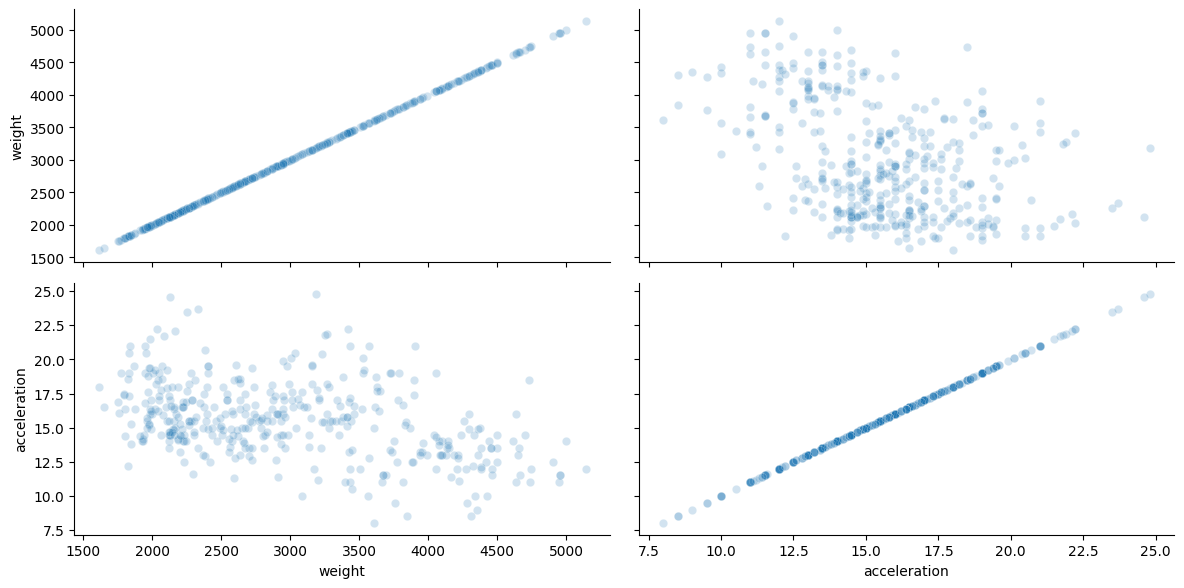

In [ ]:
columns = ['weight', 'acceleration']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,weight,acceleration
weight,1.000000,-0.268619
acceleration,-0.268619,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,weight,acceleration
weight,1.000000e+00,2.345629e-15
acceleration,2.345629e-15,1.000000e+00


Построим теполовую карту для признаков

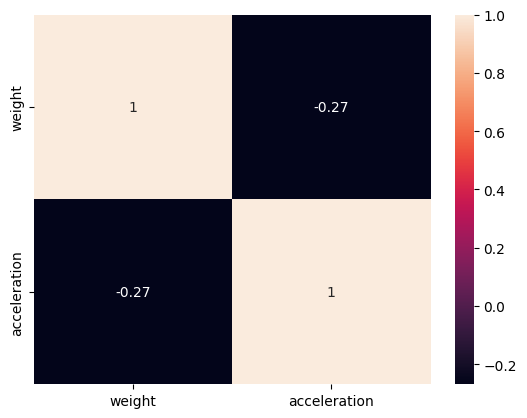

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **слабая** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная**, а направление — **отрицательное**: с ростом значения `weight` наблюдается **снижение** значения `acceleration`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.27, что подтверждает наличие **слабой** **отрицательной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 2.35e-15**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **слабая** **отрицательная** **монотонная** взаимосвязь между признаками `weight` и `acceleration`, которая является **статистически достоверной**, но не обладает выраженной практической значимостью.

### 10.21 Признаки weight и model year

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

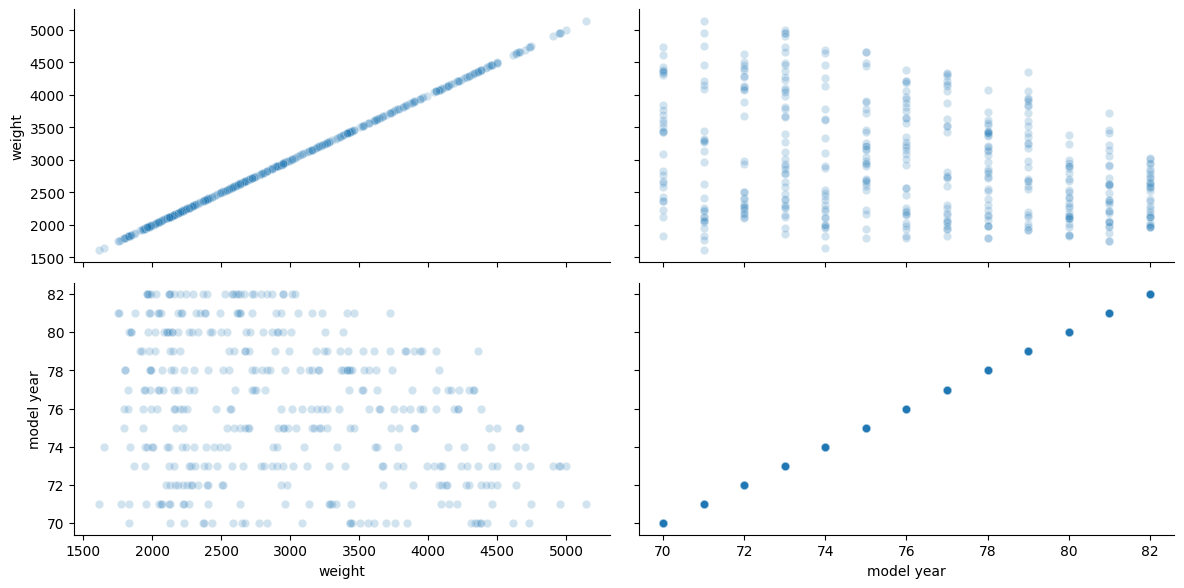

In [ ]:
columns = ['weight', 'model year']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,weight,model year
weight,1.000000,-0.196863
model year,-0.196863,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,weight,model year
weight,1.000000e+00,1.557392e-08
model year,1.557392e-08,1.000000e+00


Построим теполовую карту для признаков

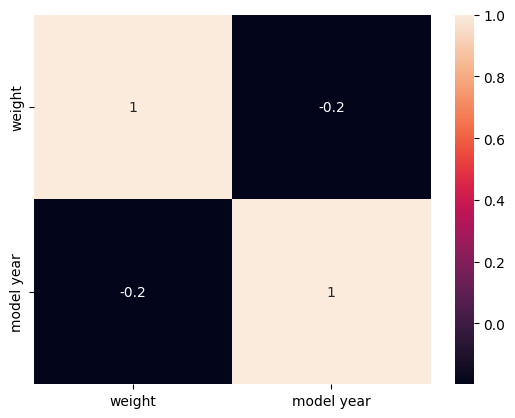

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **очень слабая** связь между признаками.
    
    * Визуально характер связи определяется как **нелинейная**, а направление — **отрицательное**: с ростом значения `model year` наблюдается **незначительное снижение** значения `weight`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = -0.20, что подтверждает наличие **очень слабой** **отрицательной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 1.56e-08**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **очень слабая** **отрицательная** **монотонная** взаимосвязь между признаками `weight` и `model year`, которая является **статистически достоверной**, но **не обладает практической значимостью**.

### 10.22 Признаки acceleration и model year

Сформулируем гипотезу H₀: Корреляция равна нулю (нет линейной связи). Уровень значимости полагаем 0.05

Построим диаграмму рассеяния

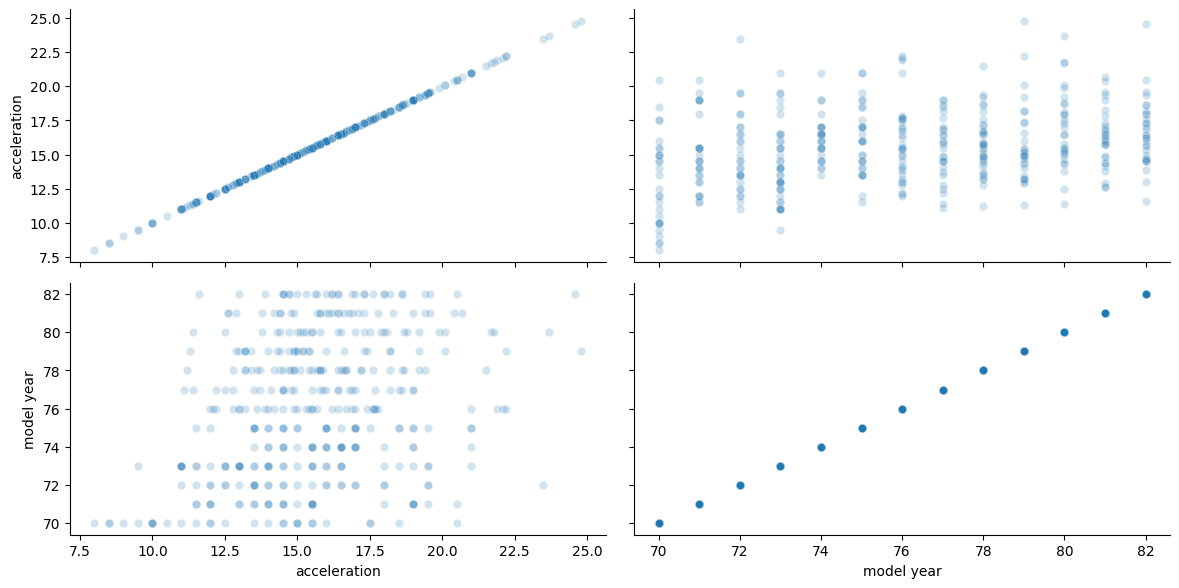

In [ ]:
columns = ['acceleration', 'model year']
plot = sns.PairGrid(numerical_traits[columns],
                   height=3,
                   aspect=2)
plot.map(sns.scatterplot, alpha=0.2)
plt.show()

Посмотрим коэффициент корреляции признаков

In [ ]:
corr_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[0])
corr_matrix

,acceleration,model year
acceleration,1.000000,0.196024
model year,0.196024,1.000000


Посмотрим на значение p_value

In [ ]:
pvalue_matrix = numerical_traits[columns].corr(method=lambda x, y: stats.kendalltau(x, y)[1])
pvalue_matrix

,acceleration,model year
acceleration,1.000000e+00,2.438055e-08
model year,2.438055e-08,1.000000e+00


Построим теполовую карту для признаков

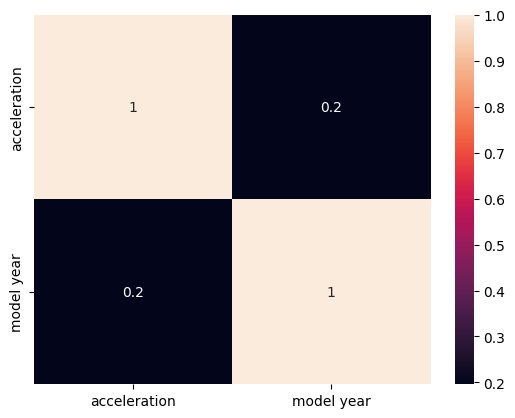

In [ ]:
heat_map = sns.heatmap(corr_matrix, annot=True)
plt.show()

Выводы по анализу взаимосвязи признаков:

* **Визуальная оценка (Диаграмма рассеяния):**
    
    * На диаграмме рассеяния наблюдается **очень слабая** связь между признаками.
    
    * Визуально характер связи определяется как **линейная**, а направление — **положительное**: с ростом значения `model year` наблюдается **незначительное увеличение** значения `acceleration`.

* **Статистическое подтверждение:**
    
    * **Монотонная связь (Коэффициент Кендалла):** Tau = 0.20, что подтверждает наличие **очень слабой** **положительной** монотонной зависимости между переменными.
    
    * **Статистическая значимость:** Значение p-value для данного коэффициента составляет **p ≈ 2.44e-08**, что **значительно меньше** стандартного уровня значимости **α = 0.05**. Следовательно, нулевая гипотеза (H₀) об отсутствии корреляции **отвергается**, и связь признаётся статистически значимой.

**Общий вывод:** Обнаружена **очень слабая** **положительная** **монотонная** взаимосвязь между признаками `acceleration` и `model year`, которая является **статистически достоверной**, но **не обладает практической значимостью**.